In [1]:
library(tidyverse) #carrega o tidverse
url <- "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados <- read_csv(url)#importa os dados

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Rows: 10008 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Rua, Bairro, Cidade, Valor
dbl (4): Metragem, Quartos, Banheiros, Vagas

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Nessa aula continuamos trabalhando com os dados de imóveis em São Paulo.<br>
Vamos relembrar a estrutura do dataset e explorar o que deve ser limpo para podermos visualizar adequadamente.

In [2]:
#limpar os nomes das variaveis para nao ter problemas com maiusculas
dados <- janitor::clean_names(dados)
glimpse(dados)

Rows: 10,008
Columns: 8
$ rua       <chr> "Avenida Itacira, 255", "Rua Aurelia Perez Alvarez, 42", "Ru…
$ bairro    <chr> "Planalto Paulista", "Jardim dos Estados", "Jardim Reimberg"…
$ cidade    <chr> "São Paulo", "São Paulo", "São Paulo", "São Paulo", "São Pau…
$ metragem  <dbl> 1000, 496, 125, 310, 100, 440, 145, 150, 48, 114, 261, 436, …
$ quartos   <dbl> 4, 4, 4, 3, 3, 4, 4, 2, 2, 3, 4, 4, 3, 3, 4, 3, 4, 3, 7, 3, …
$ banheiros <dbl> 8, 4, 3, 2, 2, 4, 4, 2, 1, 3, 4, 3, 3, 5, 5, 3, 2, 5, 7, 3, …
$ vagas     <dbl> 6, 4, 2, 4, 2, 6, 2, 2, 1, 2, 3, 3, 2, 4, 4, 2, 4, 4, 6, 4, …
$ valor     <chr> "R$ 7.000.000", "R$ 3.700.000", "R$ 380.000", "R$ 685.000", …


Percebemos que ``quartos``, ``banheiros`` e ``vagas`` estão salvos como ``double``, ou número de precisão dupla, quando podiam ser representados por valores inteiros. Claro, devemos antes de assumir isso verificar se existe algum lavabo representado como .5 banheiro por exemplo. Caso não haja essa particularidade, podemos converter essas variáveis para ``integer`` ou números inteiros.<br>
Além disso, o valor, que é nossa **variável de resposta** ou **target**, está salvo como texto. Precisamos extrair os número dessa coluna.

In [3]:
#converter colunas para tipos de dados corretos
dados %>%
    mutate(across(quartos:vagas, as.integer), #converter vagas para numero inteiro
          valor_real = as.numeric(gsub(x = valor, pattern = "[R\\$\\.]", replacement = ""))) -> dados_limpo #remover R$ e . dos valores e salvar
head(dados_limpo)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


rua,bairro,cidade,metragem,quartos,banheiros,vagas,valor,valor_real
<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<chr>,<dbl>
"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000
"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000
Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000
NA,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,685000
"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000
Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000


<p>Como exibido pelo alerta, ficaram alguns valores nulos, onde o valor na realidade era um aluguel cobrado por mês ou outra unidade de tempo.</p>
<p>Vamos remover esses valores nulos pois só nos interessam valores para venda.</p>

In [4]:
dados_limpo <- drop_na(dados_limpo, valor_real)

paste("Foram removidas", nrow(dados)-nrow(dados_limpo), "linhas")

[1] "Foram removidas 852 linhas"

Agora nosso dataset se encontra pronto para visualizações exploratórias.

## Desafios desta aula
1. Criar uma escala de valores em milhões.
1. Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala).
1. Preço do metro quadrado por bairro e plotar em um gráfico ideal.
1. Explorar as bibliotecas de visualizações e colocar as suas conclusões.
1. Pesquisar um visualização para analisar os quartis, mediana e outliers.

### 1 - Criar uma escala de valores em milhões e 2 - Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala).

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



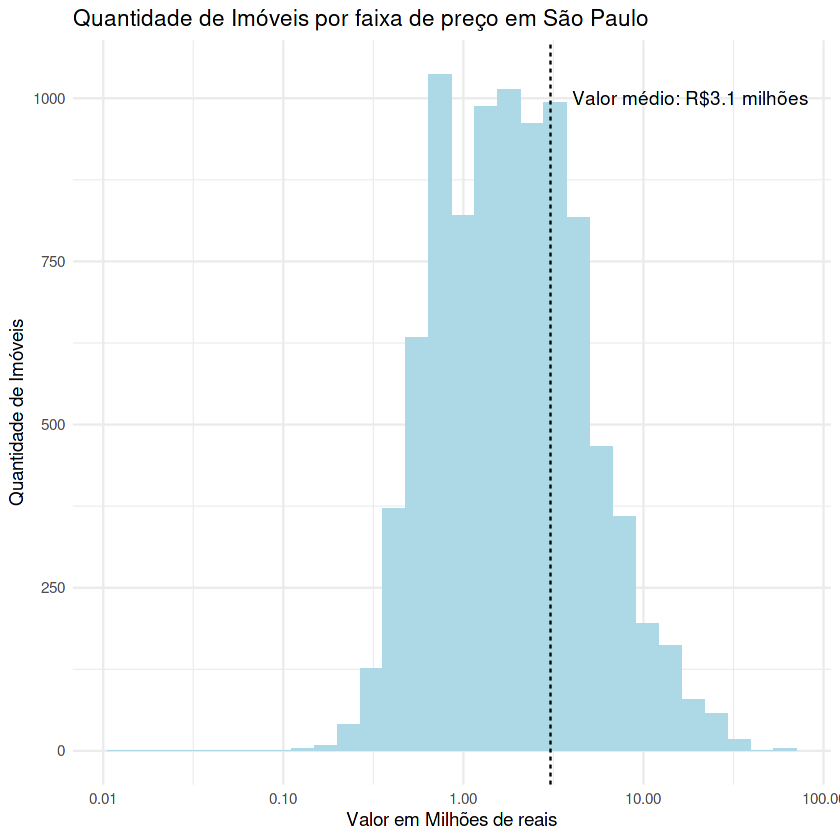

In [5]:
dados_limpo %>%
    ggplot(aes(valor_real/10^6))+
    geom_histogram(fill = "light blue")+
    xlab("Valor em Milhões de reais")+
    ylab("Quantidade de Imóveis")+
    geom_vline(xintercept = mean(dados_limpo$valor_real/10^6), linetype = "dashed")+
    annotate(geom = "text", label = paste0("Valor médio: R$",round(mean(dados_limpo$valor_real/10^6),1)," milhões"),
             x = mean(dados_limpo$valor_real/10^6)+15, y = 1000)+
    scale_x_log10(labels = scales::label_number())+
    ggtitle("Quantidade de Imóveis por faixa de preço em São Paulo")+
    theme_minimal()

### 3 - Preço do metro quadrado por bairro e plotar em um gráfico ideal.


In [6]:
#Calcular preço por metro quadrado
dados_limpo %>%
    mutate(preco_por_m2 = valor_real/metragem) -> dados_limpo
head(dados_limpo$preco_por_m2)

[1] 7000.000 7459.677 3040.000 2209.677 5400.000 4500.000

In [7]:
length(unique(dados_limpo$bairro)) #Verificar quantos bairros únicos

[1] 698

Existem 698 bairros únicos, ou seja, a opção de pequenos múltiplos, plotando gráficos separados lado a lado para cada bairro, é inviável.<br>
Podemos definir os bairros mais comuns e agrupar o restante em uma categoria "outros"

In [8]:
dados_limpo %>%
    group_by(bairro)%>% #agrupa por bairro
    tally()%>% #conta quantos imóveis cada bairro possui
    arrange(desc(n))%>% #ordena de forma decrescente
    head(9) -> top_9 #seleciona os 9 primeiros e salva em uma variavel

top_9

bairro,n
<chr>,<int>
Alto de Pinheiros,369
Jardim Guedala,353
Jardim Paulista,266
Brooklin Paulista,224
Jardim Europa,210
Pacaembu,200
Vila Madalena,198
Cidade Jardim,191
Planalto Paulista,184


Dessa forma, podemos usar essa relação para estabelecer um corte. Usaremos 184 como corte, e bairros com menos imóveis serão agrupados. Assim, consequimos uma visualização eficaz.

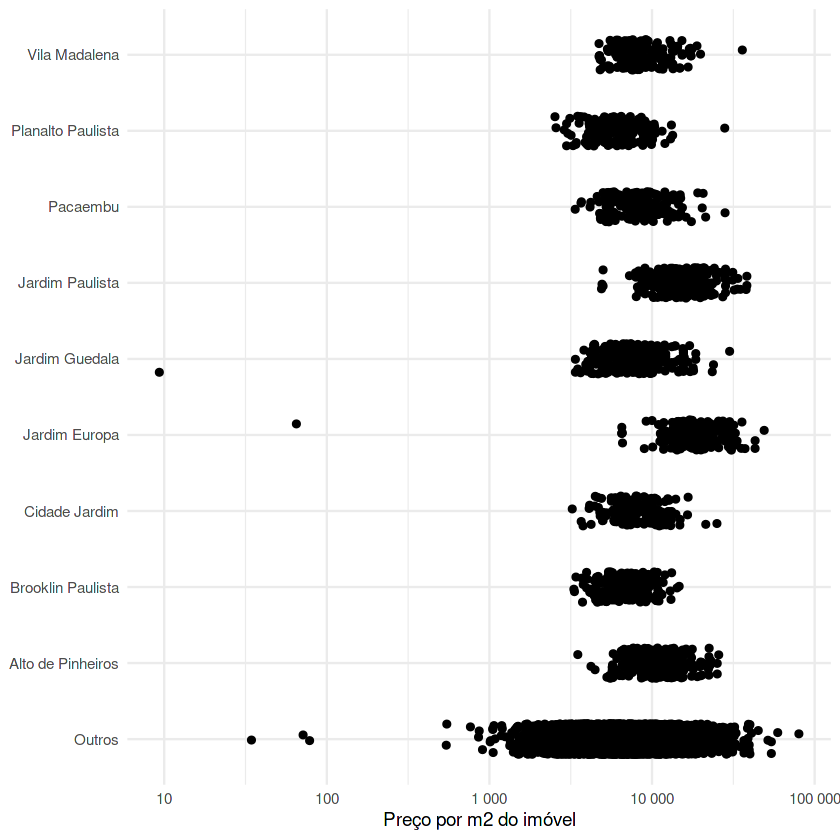

In [9]:
dados_limpo %>%
    mutate(bairro_resumido = ifelse(dados_limpo$bairro %in% top_9$bairro, dados_limpo$bairro, " Outros")) %>%
    ggplot(aes(preco_por_m2, bairro_resumido))+
    geom_jitter(width = 0, height = .2)+
    scale_x_log10(labels = scales::label_number())+
    theme_minimal()+
    ylab(NULL)+
    xlab("Preço por m2 do imóvel")

### 5 -  Pesquisar um visualização para analisar os quartis, mediana e outliers.

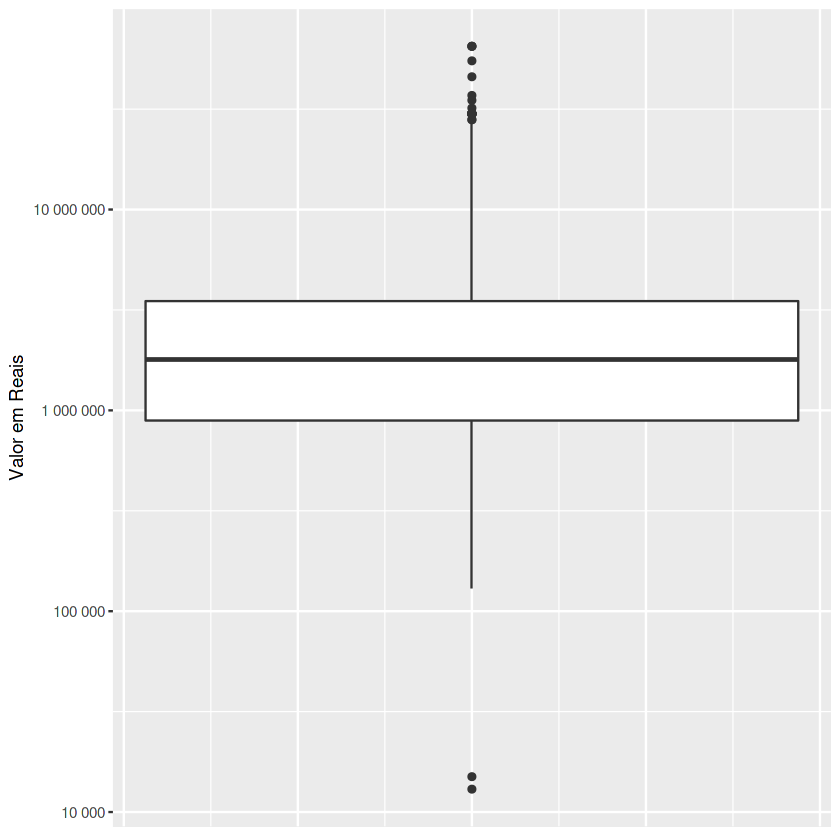

In [10]:
dados_limpo %>%
    ggplot(aes(y = valor_real))+
    geom_boxplot()+
    scale_y_log10(labels = scales::label_number())+
    theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank())+
    ylab("Valor em Reais")